In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [2]:
df = pd.read_csv('churn_modelling.csv', index_col='RowNumber')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = df.drop(["CustomerId", "Surname", "Exited"], axis=1)
Y = df["Exited"]

In [4]:
X_column_transformer = LabelEncoder()
X["Geography"] = X_column_transformer.fit_transform(X["Geography"])
X["Gender"] = X_column_transformer.fit_transform(X["Gender"])

In [5]:
pipeline = Pipeline(
    [
        ('Categorizer', ColumnTransformer(
            [
                ("Gender Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [2]),
                ("Geography Label Encoder", OneHotEncoder(categories = 'auto', drop = 'first'), [1])
            ], 
            remainder = 'passthrough', n_jobs = 1)),
        ('Normalizer', StandardScaler())
    ]
)

In [6]:
X = pipeline.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [7]:
classifier = Sequential([
	Dense(6, activation = 'relu', input_shape = (X_train.shape[1], )),
	Dropout(rate = 0.1),
	Dense(6, activation = 'relu'),
	Dropout(rate = 0.1),
	Dense(1, activation = 'sigmoid')
])
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 72        
                                                                 
 dropout (Dropout)           (None, 6)                 0         
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dropout_1 (Dropout)         (None, 6)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 121 (484.00 Byte)
Trainable params: 121 (484.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
history = classifier.fit(X_train, y_train, batch_size=32, epochs=200, validation_split=0.1, verbose=1)

c:\Python311\Lib\site-packages\keras\src\engine\data_adapter.py:1808: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


Epoch 1/200
211/211 [==============================] - 3s 5ms/step - loss: 0.5755 - accuracy: 0.7644 - val_loss: 0.5330 - val_accuracy: 0.7787
Epoch 2/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4882 - accuracy: 0.8028 - val_loss: 0.4989 - val_accuracy: 0.7853
Epoch 3/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.8105 - val_loss: 0.4806 - val_accuracy: 0.7960
Epoch 4/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4433 - accuracy: 0.8207 - val_loss: 0.4714 - val_accuracy: 0.8013
Epoch 5/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4368 - accuracy: 0.8204 - val_loss: 0.4672 - val_accuracy: 0.8067
Epoch 6/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4327 - accuracy: 0.8246 - val_loss: 0.4625 - val_accuracy: 0.8040
Epoch 7/200
211/211 [==============================] - 1s 3ms/step - loss: 0.4334 - accuracy: 0.8241 - val_loss: 0.4604 - val_accuracy: 0.8053

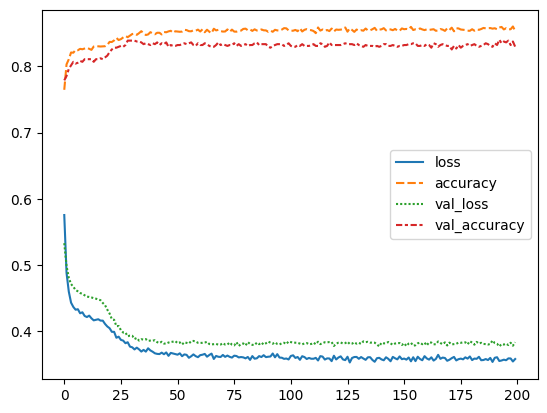

In [9]:
sns.lineplot(history.history)
plt.show()

In [10]:
y_pred = classifier.predict(X_test)
pd.DataFrame(y_pred).head()

79/79 [==============================] - 0s 2ms/step


,0
0,0.054344
1,0.120251
2,0.100242
3,0.070276
4,0.091951


In [11]:
cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int))
print(cm)

[[1951   29]
 [ 321  199]]


In [12]:
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')

86.0 % of data was classified correctly
